In [1]:
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import category_encoders as ce
from sklearn.preprocessing import StandardScaler 

from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import (
    accuracy_score,
    auc,
    classification_report,
    confusion_matrix,
    f1_score,
    precision_recall_curve,
    precision_recall_fscore_support,
    precision_score,
    recall_score,
    roc_auc_score,
    roc_curve,
)

In [2]:
# Import datasets
X_test = joblib.load('../data/X_test.pkl')
y_test = joblib.load('../data/y_test.pkl')

In [3]:
# Import models
lgbm = joblib.load('../data/lgbm_model.pkl')
lr = joblib.load('../data/lr_model.pkl')
rf = joblib.load('../data/rf_optuna_no_smote.pkl')
svm = joblib.load('../data/svm.pkl')

In [4]:
# Import encoders
target_encoder = joblib.load('../data/target_encoder.pkl')
one_hot_encoder = joblib.load('../data/one_hot_encoder.pkl')

# Import scaler
scaler = joblib.load('../data/scaler.pkl')

In [5]:
# Encode test set
X_test_enc = X_test.copy()
X_test_enc = target_encoder.transform(X_test_enc) 
X_test_enc = one_hot_encoder.transform(X_test_enc)

# Scale test set
X_test_scaled = scaler.transform(X_test_enc)

## Logistic Regression

In [6]:
y_pred_lr = lr.predict(X_test_scaled)
y_pred_prob_lr = lr.predict_proba(X_test_scaled)[:, 1]

print(classification_report(y_test, y_pred_lr, digits=4))

roc_auc_lr = roc_auc_score(y_test, y_pred_prob_lr)
print(f'ROC-AUC for Logistic Regression: {roc_auc_lr:.4f}')

prec_lr, rec_lr, _ = precision_recall_curve(y_test, y_pred_prob_lr)
pr_auc_lr = auc(rec_lr, prec_lr)
print(f'PR-AUC for Logistic Regression: {pr_auc_lr:.4f}')

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_prob_lr)

              precision    recall  f1-score   support

           0     0.9801    0.6781    0.8016      2246
           1     0.0906    0.6990    0.1604       103

    accuracy                         0.6790      2349
   macro avg     0.5353    0.6886    0.4810      2349
weighted avg     0.9410    0.6790    0.7735      2349

ROC-AUC for Logistic Regression: 0.7655
PR-AUC for Logistic Regression: 0.1243


## LightGBM (No Scaling)

In [7]:
y_pred_lgbm = lgbm.predict(X_test_enc)
y_pred_prob_lgbm = lgbm.predict_proba(X_test_enc)[:, 1]

print(classification_report(y_test, y_pred_lgbm, digits=4))

fpr_lgbm, tpr_lgbm, _ = roc_curve(y_test, y_pred_prob_lgbm)
roc_auc_lgbm = roc_auc_score(y_test,  y_pred_prob_lgbm)
print(f'ROC-AUC for LightGBM: {roc_auc_lgbm:.4f}')

prec_lgbm, rec_lgbm, _ = precision_recall_curve(y_test, y_pred_prob_lgbm)
pr_auc_lgbm = auc(rec_lgbm, prec_lgbm)
print(f'PR-AUC for LightGBM: {pr_auc_lgbm:.4f}')

              precision    recall  f1-score   support

           0     0.9805    0.7182    0.8291      2246
           1     0.1009    0.6893    0.1760       103

    accuracy                         0.7169      2349
   macro avg     0.5407    0.7037    0.5025      2349
weighted avg     0.9420    0.7169    0.8005      2349

ROC-AUC for LightGBM: 0.7690
PR-AUC for LightGBM: 0.1615


## Random Forest (No Scaling)

In [8]:
y_pred_rf = rf.predict(X_test)
y_pred_prob_rf = rf.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred_rf, digits=4))

roc_auc_rf = roc_auc_score(y_test, y_pred_prob_rf)
print(f'ROC-AUC for Random Forest: {roc_auc_rf:.4f}')

prec_rf, rec_rf, _ = precision_recall_curve(y_test, y_pred_prob_rf)
pr_auc_rf = auc(rec_rf, prec_rf)
print(f'PR-AUC for Random Forest: {pr_auc_rf:.4f}')

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)

              precision    recall  f1-score   support

           0     0.9768    0.7685    0.8602      2246
           1     0.1065    0.6019    0.1810       103

    accuracy                         0.7612      2349
   macro avg     0.5417    0.6852    0.5206      2349
weighted avg     0.9386    0.7612    0.8304      2349

ROC-AUC for Random Forest: 0.7661
PR-AUC for Random Forest: 0.1474


### SVM

In [9]:
y_pred_svm = svm.predict(X_test_scaled)
y_pred_prob_svm = svm.decision_function(X_test_scaled)

print(classification_report(y_test, y_pred_svm, digits=4))

roc_auc_svm = roc_auc_score(y_test, y_pred_prob_svm)
print(f'ROC-AUC for SVM: {roc_auc_svm:.4f}')

prec_svm, rec_svm, _ = precision_recall_curve(y_test, y_pred_prob_svm)
pr_auc_svm = auc(rec_svm, prec_svm)
print(f'PR-AUC for SVM: {pr_auc_svm:.4f}')

fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_prob_svm)

              precision    recall  f1-score   support

           0     0.9833    0.6273    0.7660      2246
           1     0.0862    0.7670    0.1551       103

    accuracy                         0.6335      2349
   macro avg     0.5347    0.6972    0.4605      2349
weighted avg     0.9439    0.6335    0.7392      2349

ROC-AUC for SVM: 0.7733
PR-AUC for SVM: 0.1241


## Comparing Models

In [10]:
results = []

def evaluate_model(name, y_test, y_pred, y_pred_prob):
    precision, recall, f1, _ = precision_recall_fscore_support(
        y_test, y_pred, average='binary'
    )
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    prec, rec, _ = precision_recall_curve(y_test, y_pred_prob)
    pr_auc = auc(rec, prec)

    results.append({
        'Model': name,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Accuracy': accuracy,
        'ROC-AUC': roc_auc,
        'PR-AUC': pr_auc
    })

# Evaluate all models
evaluate_model('LR', y_test, y_pred_lr, y_pred_prob_lr)
evaluate_model('LightGBM', y_test, y_pred_lgbm, y_pred_prob_lgbm)
evaluate_model('RF', y_test, y_pred_rf, y_pred_prob_rf)
evaluate_model('SVM', y_test, y_pred_svm, y_pred_prob_svm)

# Creating the results table
results_df = pd.DataFrame(results)
results_df = results_df.round(4)
results_df = results_df.reset_index(drop=True)

# Styling
styled_table = (
    results_df.style
    .background_gradient(cmap='Blues', subset=['Precision', 'Recall', 'F1 Score', 'Accuracy', 'PR-AUC', 'ROC-AUC'])
    .format({
        'Precision': '{:.4f}',
        'Recall': '{:.4f}',
        'F1 Score': '{:.4f}',
        'Accuracy': '{:.4f}',
        'ROC-AUC': '{:.4f}',
        'PR-AUC': '{:.4f}'
    })
    .set_table_styles([
        # Header row styling
        {'selector': 'thead th',
         'props': [
             ('font-size', '13px'),
             ('text-align', 'center'),
             ('background-color', '#1e3a8a'),
             ('color', 'white'),
             ('border-bottom', '2px solid #0f172a')
         ]},
        # Caption styling
        {'selector': 'caption',
         'props': [
             ('caption-side', 'top'),
             ('font-size', '15px'),
             ('font-weight', 'bold'),
             ('color', '#1e3a8a'),
             ('text-align', 'center')
         ]},
        # Support column neutral dark grey color
        {'selector': 'tbody td.col0, tbody td.col1, tbody td.col2, tbody td.col3, tbody td.col4, tbody td.col5, tbody td.col6',
         'props': [('text-align', 'center')]}
    ])
    .set_caption('Model Comparison for Predicting Fraud')
)

display(styled_table)

,Model,Precision,Recall,F1 Score,Accuracy,ROC-AUC,PR-AUC
0,LR,0.0906,0.6990,0.1604,0.6790,0.7655,0.1243
1,LightGBM,0.1009,0.6893,0.1760,0.7169,0.7690,0.1615
2,RF,0.1065,0.6019,0.1810,0.7612,0.7661,0.1474
3,SVM,0.0862,0.7670,0.1551,0.6335,0.7733,0.1241


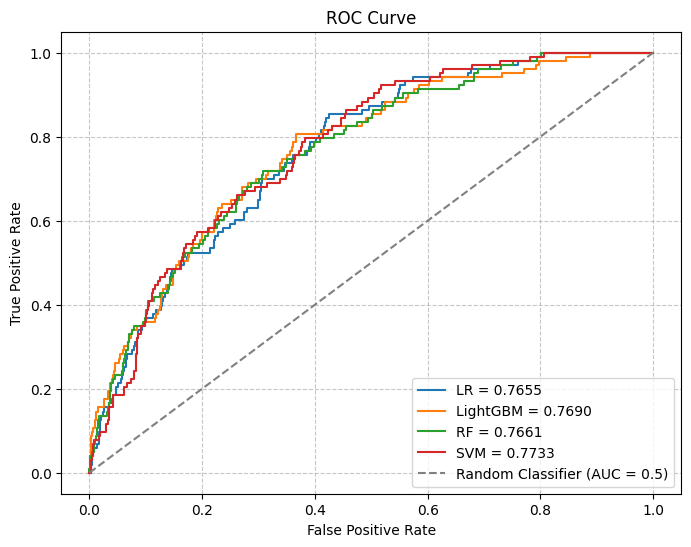

In [11]:
# ROC curve
roc_data = [
    ('LR', fpr_lr, tpr_lr, roc_auc_lr),
    ('LightGBM', fpr_lgbm, tpr_lgbm, roc_auc_lgbm),
    ('RF', fpr_rf, tpr_rf, roc_auc_rf),
    ('SVM', fpr_svm, tpr_svm, roc_auc_svm)
]

plt.figure(figsize=(8,6))

for name, fpr, tpr, auc_score in roc_data:
    plt.plot(fpr, tpr, label=f'{name} = {auc_score:.4f}')
    
plt.plot([0,1],[0,1],'--',color='grey', label='Random Classifier (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.7, linestyle='--')
plt.show()

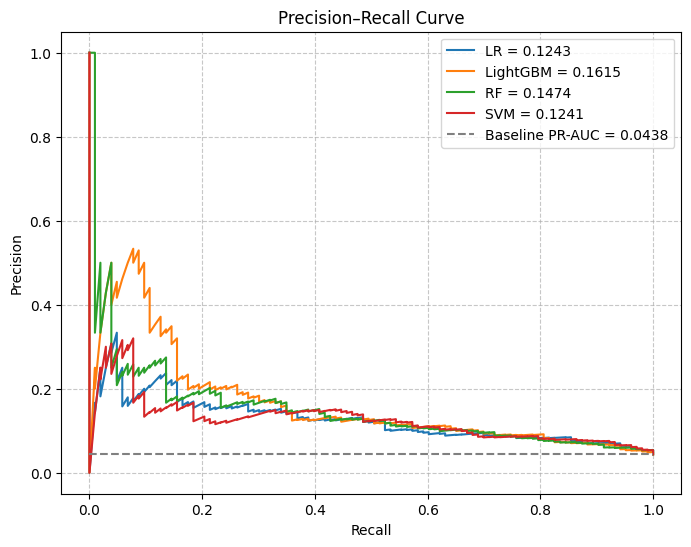

In [12]:
pr_data = [
    ('LR', rec_lr, prec_lr, pr_auc_lr),
    ('LightGBM', rec_lgbm, prec_lgbm, pr_auc_lgbm),
    ('RF', rec_rf, prec_rf, pr_auc_rf),
    ('SVM', rec_svm, prec_svm, pr_auc_svm)
]

plt.figure(figsize=(8,6))

for name, rec, prec, pr_score in pr_data:
    plt.plot(rec, prec, label=f'{name} = {pr_score:.4f}')
    
baseline_pr_auc = y_test.astype(int).mean()
plt.hlines(baseline_pr_auc, 0, 1, color='grey', linestyles='--', label=f'Baseline PR-AUC = {baseline_pr_auc:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision–Recall Curve')
plt.legend()
plt.grid(True, alpha=0.7, linestyle='--')
plt.show()